<a href="https://colab.research.google.com/github/doyoung241/-/blob/main/%EC%A0%84%EB%A0%A5%EC%88%98%EC%9A%94%EB%9F%89%20%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전력 수요량 예측 프로젝트 (시계열데이터분석 중간보고서)

**✅ 조원 이름: (김도영,김남훈)**

## 1. 시계열 데이터에 대한 설명

한국전력거래소의 '시간별 전국 전력수요량' 데이터를 사용하였다. 데이터를 wide 포맷에서 long 포맷으로 변환한 후 datetime 인덱스를 추가하여 시계열 데이터로 구성하였다.

## 2. 데이터 탐색 및 분석 포인트

시간대별, 요일별, 월별 전력 사용 패턴을 분석하고, 시계열 분해(Trend, Seasonality, Residuals)를 수행하였다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
file_path = "한국전력거래소_시간별 전국 전력수요량_20241231.csv"
df = pd.read_csv(file_path, encoding="cp949")

# wide -> long 변환
df_long = df.melt(id_vars=["날짜"], var_name="시간", value_name="전력수요(MW)")
df_long.loc[df_long["시간"] == "24시", "시간"] = "00시"
df_long.loc[df_long["시간"] == "00시", "날짜"] = pd.to_datetime(df_long.loc[df_long["시간"] == "00시", "날짜"]) + pd.Timedelta(days=1)
df_long["날짜"] = pd.to_datetime(df_long["날짜"])
df_long["datetime"] = pd.to_datetime(df_long["날짜"].dt.strftime('%Y-%m-%d') + " " + df_long["시간"], format="%Y-%m-%d %H시")
df_long = df_long.sort_values("datetime").set_index("datetime")[["전력수요(MW)"]]


<ipython-input-2-8bc249608450>:26: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-8bc249608450>:26: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-8bc249608450>:26: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-8bc249608450>:26: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-8bc249608450>:26: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-8bc249608450>:26: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-2-8bc249608450>:26: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

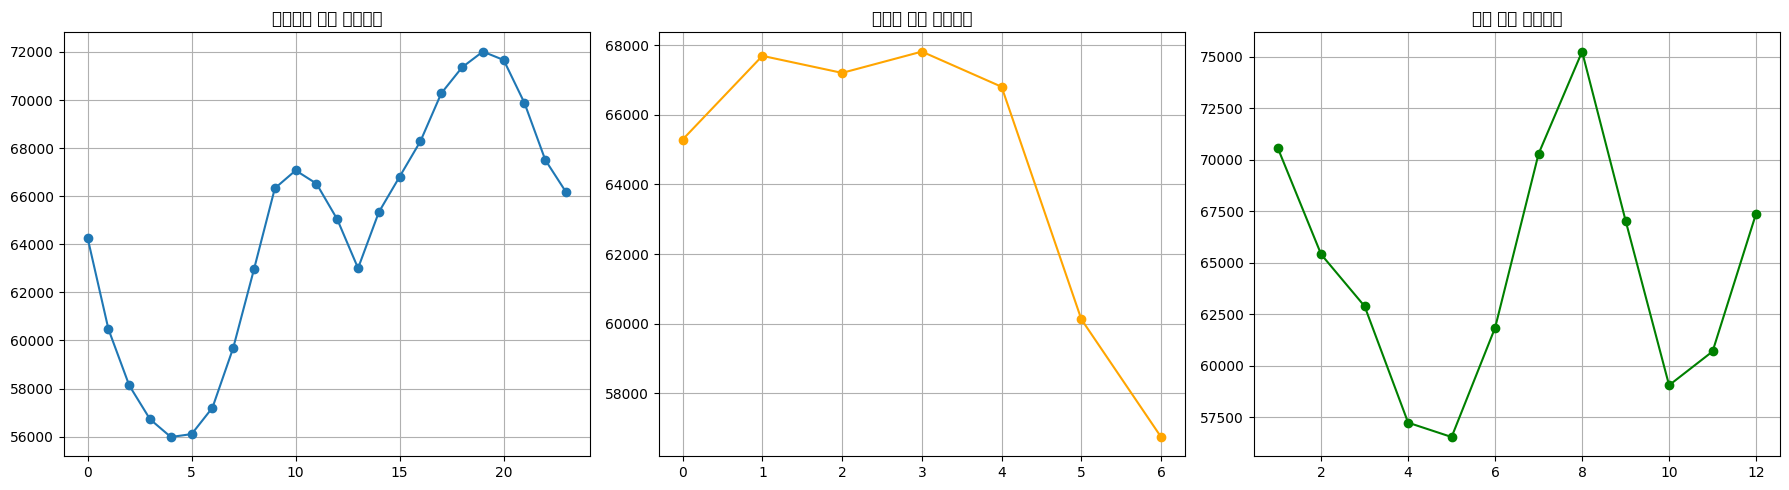

In [2]:
# 시간대, 요일, 월 파생변수 생성
df_long["시간"] = df_long.index.hour
df_long["요일"] = df_long.index.dayofweek
df_long["월"] = df_long.index.month

# 평균 계산
hourly_avg = df_long.groupby("시간")["전력수요(MW)"].mean()
weekday_avg = df_long.groupby("요일")["전력수요(MW)"].mean()
monthly_avg = df_long.groupby("월")["전력수요(MW)"].mean()

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(hourly_avg.index, hourly_avg.values, marker='o')
axs[0].set_title("시간대별 평균 전력수요")
axs[0].grid(True)

axs[1].plot(weekday_avg.index, weekday_avg.values, marker='o', color='orange')
axs[1].set_title("요일별 평균 전력수요")
axs[1].grid(True)

axs[2].plot(monthly_avg.index, monthly_avg.values, marker='o', color='green')
axs[2].set_title("월별 평균 전력수요")
axs[2].grid(True)

plt.tight_layout()
plt.show()


## 3. 시계열 데이터 분해 (Trend / Seasonality / Residuals)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning

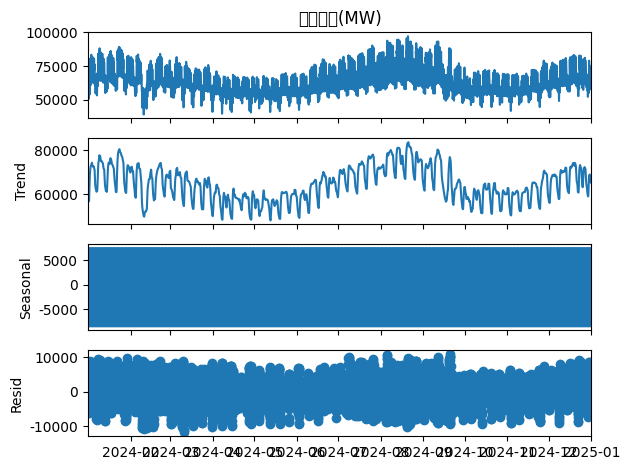

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 하루(24시간) 주기로 시계열 분해
result = seasonal_decompose(df_long["전력수요(MW)"], model='additive', period=24)
result.plot()
plt.show()


## 4. 시계열 모델 적용

Holt-Winters 가법모델을 사용하여 향후 48시간 전력 수요 예측을 수행하였다.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

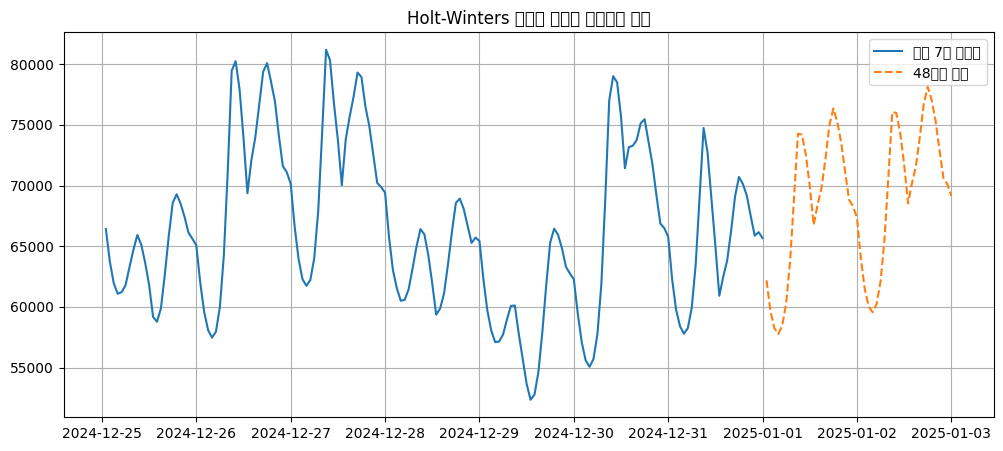

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

series = df_long["전력수요(MW)"]

# 모델 학습
model = ExponentialSmoothing(series, trend="add", seasonal="add", seasonal_periods=24)
fit = model.fit()

# 48시간 예측
forecast = fit.forecast(48)

# 결과 시각화
plt.figure(figsize=(12,5))
plt.plot(series[-168:], label="최근 7일 실제값")
plt.plot(forecast, label="48시간 예측", linestyle="--")
plt.title("Holt-Winters 모델을 이용한 전력수요 예측")
plt.legend()
plt.grid(True)
plt.show()



## 5. 의미 해석 및 가치 도출

이번 프로젝트에서는 한국전력거래소의 2024년 한 해 동안의 시간별 전국 전력 수요 데이터를 바탕으로 전력 사용의 주기성과 추세를 분석하고, 이를 활용하여 단기 예측 모델을 구현하였습니다.


첫 번째로 시간대별 전력 수요 분석 결과 새벽 시간대인 00시부터 05시까지의 전력 수요가 가장 낮고 점점 증가하다가 점심시간대인 11시부터 13시까지 잠시 감소 했다가 다시 증가하는 모습을 보여 저녁 19시 경에는 가장 높은 수치를 보인 모습을 알 수 있었습니다. 이는 국민들의 산업 및 사회 활동의 시작과 종료 시간대와 민접한 관련이 있을 것으로 보여줍니다.

두 번째로 요일별 수요 분석에서는 월요일부터 금요일 까지의 수요가 상대적으로 높고, 주말인 토요일과 일요일에는 낮은 수준을 보였습니다. 이는 주중에 산업 및 사회 활동이 전력 소비에 큰 영향을 미친다는 것을 보여주고 있습니다.

세 번째로 월별 분석 결과 여름철과 겨울철에 전력 수요가 다른 계절에 비해 뚜렷하게 증가하는 계절성이 확인되었습니다. 냉난방 기기의 사용 증가에 따라 계절적 수요가 뚜렷하게 나타난다는 모습으로 보이며, 이는 기후 요인이 전력 소비에 직접적인 영향을 미친다고 할 수 있겠습니다.

네 번째로는 시계열 분해를 통해 전력 수요의 뚜렷한 일일주기성과 점진적인 수요 증가 추세, 그리고 잔차에 나타난 이례적 수요 변화를 확인하였습니다. 이러한 잔차는 갑작스러운 기후 변화, 올림픽과 같은 대규모 이벤트, 공휴일 등과 같은 외부 요인의 영향을 포함하고 있을 가능성이 높습니다.

다섯번쨰, Holt-Winters 가법 모델을 적용하여 48시간 단기 수요 예측을 수행한 결과, 실제 수요 변화와 유사한 패턴을 성공적으로 재현하였습니다. 이는 해당 모델이 일 단위의 계절성과 추세를 잘 반영하고 있음을 의미하며, 단기적인 전력 수급 예측에 효과적으로 활용될 수 있음을 보여줍니다.

이러한 예측 모델을 통하여 우리는 시간대별 전력 수요에 따라 요금제를 차등 적용하여 수요를 분산시킬 수 있으며 계절별 전력 소비 패턴을 고려하여 전력을 많이 사용하는 여름과 겨울철을 대비한 예비 전력 홥고 전략을 수립하여 만일에 대비할 수 있습니다.


NameError: name 'df_all' is not defined

In [14]:
# 🤖 5. N-BEATS 예측 (딥러닝)
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae as d_mae, rmse as d_rmse

series = TimeSeries.from_dataframe(df_long, value_cols='수요량(MWh)')
train, val = series.split_before(0.8)
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)

nbeats = NBEATSModel(input_chunk_length=168, output_chunk_length=24, n_epochs=30, batch_size=32, random_state=42)
nbeats.fit(train_scaled, verbose=True)
nbeats_pred = scaler.inverse_transform(nbeats.predict(len(val_scaled)))

print("NBEATS - MAE:", d_mae(val, nbeats_pred))
print("NBEATS - RMSE:", d_rmse(val, nbeats_pred))

val.plot(label='실제값')
nbeats_pred.plot(label='N-BEATS 예측')
plt.title('N-BEATS 예측 결과')
plt.legend()
plt.show()

KeyError: "None of [Index(['전력수요(MW))'], dtype='object')] are in the [columns]"

In [ ]:

# 📈 4. ARIMA 예측
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

split_idx = int(len(df_long)*0.8)
train = df_long.iloc[:split_idx]
test = df_long.iloc[split_idx:]

# 반드시 Series로!
model = ARIMA(train['수요량(MWh)'], order=(3,1,2))
model_fit = model.fit()
pred = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test['수요량(MWh)'], pred)
rmse = mean_squared_error(test['수요량(MWh)'], pred) ** 0.5
print(f'ARIMA 예측 → MAE: {mae:.2f}, RMSE: {rmse:.2f}')

In [ ]:
#DLinear 모델 시각화
plt.figure(figsize=(20, 4))
input_series.plot(label="입력 (최근 3개월)", lw=1.5, color="black")
forecast_d.plot(label="DLinear 예측 (다음 3개월)", lw=1.5, color="green")

plt.title("DLinear 모델 예측")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#NLinear 모델 시각화
plt.figure(figsize=(20, 4))
input_series.plot(label="입력 (최근 3개월)", lw=1.5, color="black")
forecast_n.plot(label="NLinear 예측 (다음 3개월)", lw=1.5, color="blue")

plt.title("NLinear 모델 예측")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#DLinear NLinear 한 박스에 비교
fig, axes = plt.subplots(2, 1, figsize=(20, 8), sharex=True)

# DLinear
input_series.plot(ax=axes[0], label="입력", color='black')
forecast_d.plot(ax=axes[0], label="DLinear 예측", color='green')
axes[0].set_title("DLinear 예측 결과")
axes[0].legend()
axes[0].grid(True)

# NLinear
input_series.plot(ax=axes[1], label="입력", color='black')
forecast_n.plot(ax=axes[1], label="NLinear 예측", color='blue')
axes[1].set_title("NLinear 예측 결과")
axes[1].legend()
axes[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!pip install darts[torch] --upgrade

In [ ]:
# 필요 시 설치: !pip install darts[torch] --upgrade
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TSMixerModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae, rmse

# 분기별로 반복
for 분기, df_quarter in df_all.groupby('분기'):
    print(f"\n==== {분기} TSMixer 예측 ====")
    if len(df_quarter) < 300:
        print("데이터 부족(300 미만)으로 건너뜀")
        continue

    # 시계열 구성
    series = TimeSeries.from_dataframe(df_quarter, value_cols='수요량(MWh)')
    covariates = TimeSeries.from_dataframe(df_quarter, value_cols=['강수량', '기온', '습도', '풍속', '하늘상태'])

    # 학습/검증 분할
    train, val = series.split_before(0.8)
    cov_train, cov_val = covariates.split_before(0.8)

    # 정규화
    scaler = Scaler()
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    cov_scaler = Scaler()
    cov_train_scaled = cov_scaler.fit_transform(cov_train)
    cov_val_scaled = cov_scaler.transform(cov_val)

    # TSMixer 모델 정의 및 학습
    model = TSMixerModel(
        input_chunk_length=24,
        output_chunk_length=12,
        n_epochs=3,  # 더 좋은 결과를 위해선 20 이상 권장
        batch_size=8,
        random_state=42,
        force_reset=True
    )
    model.fit(train_scaled, past_covariates=cov_train_scaled, verbose=True)

    # 예측
    pred = scaler.inverse_transform(model.predict(len(val_scaled), past_covariates=cov_val_scaled))

    # 평가 및 시각화
    print("MAE:", mae(val, pred), "RMSE:", rmse(val, pred))
    val.plot(label='실제값')
    pred.plot(label='TSMixer 예측')
    plt.title(f'{분기} TSMixer 예측')
    plt.legend()
    plt.show()


In [ ]:

# 필요시 설치: !pip install darts[torch]

import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TSMixerModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae, rmse

for 분기, df_quarter in df_all.groupby('분기'):
    print(f"\n==== {분기} TSMixer 예측 ====")
    if len(df_quarter) < 300:
        print("데이터 부족(300 미만)으로 건너뜀")
        continue

    series = TimeSeries.from_dataframe(df_quarter, value_cols='수요량')
    covariates = TimeSeries.from_dataframe(df_quarter, value_cols=['강수량', '기온', '습도', '풍속', '하늘상태'])
    train, val = series.split_before(0.8)
    cov_train, cov_val = covariates.split_before(0.8)
    scaler = Scaler()
    train_scaled = scaler.fit_transform(train)
    val_scaled = scaler.transform(val)
    cov_scaler = Scaler()
    cov_train_scaled = cov_scaler.fit_transform(cov_train)
    cov_val_scaled = cov_scaler.transform(cov_val)

    tsmixer = TSMixerModel(
        input_chunk_length=24,
        output_chunk_length=12,
        n_epochs=3,
        batch_size=8,
        random_state=42,
        force_reset=True
    )
    tsmixer.fit(train_scaled, past_covariates=cov_train_scaled, verbose=False)
    pred = scaler.inverse_transform(tsmixer.predict(len(val_scaled), past_covariates=cov_val_scaled))

    print("MAE:", mae(val, pred), "RMSE:", rmse(val, pred))
    plt.figure(figsize=(10, 3))
    val.plot(label='실제값')
    pred.plot(label='TSMixer 예측')
    plt.title(f'{분기} TSMixer 예측')
    plt.legend()
    plt.show()
